In [ ]:
%pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)


In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn import model_selection
import re
import cv2 
import pickle
import collections
from mlxtend.evaluate import bias_variance_decomp
import sys
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import os
from keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
!wget https://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt

--2020-12-27 16:59:46--  https://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt
Resolving www.cs.columbia.edu (www.cs.columbia.edu)... 128.59.11.206
Connecting to www.cs.columbia.edu (www.cs.columbia.edu)|128.59.11.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14879205 (14M) [text/plain]
Saving to: ‘lfw_attributes.txt.1’

lfw_attributes.txt. 100%[===================>]  14.19M  38.0MB/s    in 0.4s    

2020-12-27 16:59:47 (38.0 MB/s) - ‘lfw_attributes.txt.1’ saved [14879205/14879205]



In [ ]:
lfw_attr_df = pd.read_csv('/content/drive/MyDrive/lfw_attributes (1).txt', sep='\t')

In [ ]:
lfw_attr_df = lfw_attr_df.sort_values(by = ['person','imagenum']).reset_index()

In [ ]:
lfw_attr_df

,index,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,Blond Hair,Brown Hair,Bald,No Eyewear,Eyeglasses,Sunglasses,Mustache,Smiling,Frowning,Chubby,Blurry,Harsh Lighting,Flash,Soft Lighting,Outdoor,Curly Hair,Wavy Hair,Straight Hair,Receding Hairline,Bangs,Sideburns,Fully Visible Forehead,Partially Visible Forehead,Obstructed Forehead,Bushy Eyebrows,Arched Eyebrows,Narrow Eyes,Eyes Open,Big Nose,Pointy Nose,Big Lips,Mouth Closed,Mouth Slightly Open,Mouth Wide Open,Teeth Not Visible,No Beard,Goatee,Round Jaw,Double Chin,Wearing Hat,Oval Face,Square Face,Round Face,Color Photo,Posed Photo,Attractive Man,Attractive Woman,Indian,Gray Hair,Bags Under Eyes,Heavy Makeup,Rosy Cheeks,Shiny Skin,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,144,AJ Cook,1,-2.104314,-2.049644,1.591600,-1.045685,-2.232376,-0.911712,0.613642,-0.781887,-0.469519,-2.134022,0.259740,-0.399168,-0.955021,1.398198,-1.672662,-1.913673,-1.568783,1.217378,-1.091407,-1.084214,0.113658,-1.070251,-1.349068,1.471936,-0.193661,-1.179737,0.797967,-0.199745,-0.189665,-1.459674,-0.715646,0.492145,-0.590754,-1.662891,-1.697660,0.595205,0.183200,1.177262,-0.820957,0.878082,0.199702,-2.022538,1.031802,-0.766861,-1.629627,1.939009,-1.621833,0.472361,-0.650781,-1.044123,0.755627,-0.889680,-0.179141,3.970207,0.173077,-0.218302,0.215714,-1.204161,-0.264377,-0.560254,0.339852,-1.067153,-0.643452,0.355319,-2.124374,0.262077,1.002586,-2.470392,0.393498,0.504409,0.256225,-0.676691,0.651946
1,146,AJ Lamas,1,0.061314,-1.203843,0.190530,-1.449693,-2.193837,-0.707221,0.424077,-0.337895,-1.590642,0.203110,-1.290852,0.435695,-2.284691,1.036152,-2.073315,-1.197389,-0.959911,1.770823,-1.826037,-0.183074,-0.511608,-1.014936,-0.751053,-0.295913,0.078646,-0.191760,-0.192023,0.187123,-1.184076,-1.818376,-0.156625,1.800434,-0.841633,-1.407118,1.247150,-1.967140,1.065071,-0.816203,0.251698,0.857221,-0.764121,-1.559352,1.083119,-1.139153,-1.504028,0.810678,-1.179770,0.373403,0.298982,-1.333305,-0.068794,-0.377818,-0.614986,4.460063,-0.373017,0.645052,-0.537634,-0.160146,-1.273715,-0.221322,-0.956932,1.365309,-0.458549,-0.645629,-0.689628,0.265309,-0.384761,0.291451,0.738267,0.841001,-0.060254,-0.637451,0.209275
2,0,Aaron Eckhart,1,1.568346,-1.889043,1.737203,-0.929729,-1.471799,-0.195580,-0.835609,-0.351468,-1.012533,-0.719593,-0.632401,0.464839,-0.973528,1.565186,-1.296704,-1.542719,-0.684671,-0.864990,0.766886,-0.218952,-1.655665,-0.787044,-0.599665,0.458519,0.189760,0.851555,-0.385720,-0.497719,-0.161149,-0.257514,-0.088839,0.455469,-0.839211,-0.022948,-0.922568,-0.114539,1.461222,1.758481,0.068894,1.267860,-1.120244,0.917617,-1.307957,-1.500413,1.029221,0.832363,-0.498657,0.251365,-0.705281,-0.515715,0.374239,-0.168675,-0.614143,3.097703,1.523858,0.779278,-0.071454,-1.246483,-0.769283,-0.725597,-1.820610,-2.072977,-0.960759,0.361738,1.166118,-1.164916,-1.139990,-2.371746,-1.299932,-0.414682,-1.144902,0.694007,-0.826609
3,1,Aaron Guiel,1,0.169851,-0.982408,0.422709,-1.282184,-1.360060,-0.867002,-0.452293,-0.197521,-0.956073,-0.802107,-0.736883,0.294554,-1.277647,0.954771,-0.990992,-1.167359,-0.835146,0.798544,-0.971679,0.342826,-1.322562,0.962937,-1.199363,-0.157307,0.443224,-0.002882,-0.021158,-0.226563,-0.081039,-0.827202,-0.106624,1.227594,-0.812223,-1.241258,0.096272,-0.404544,0.325919,0.474452,1.135359,0.058725,0.611176,-1.172510,0.428512,-0.874235,-1.191565,0.192359,-0.204166,0.342347,0.239512,-1.474690,0.236057,-0.565208,-0.712542,2.997076,-0.273306,-0.187722,-0.604608,-1.321701,-0.938559,0.494294,-0.659043,-1.143747,-0.775722,-0.832036,-0.397680,0.874160,-0.945431,-0.268649,-0.006244,-0.030406,-0.480128,0.666760,-0.496559
4,2,Aaron Patterson,1,0.997749,-1.364195,-0.157377,-0.756447,-1.891825,-0.871526,-0.862893,0.031445,-1.341523,-0.090037,-1.200725,-0.332460,-0.537006,1.298364,-1.498471,-1.285823,1.141742,0.172817,0.106412,-0.788843,0.34

In [ ]:
lfw_attr_df[lfw_attr_df['Eyeglasses']  > 1]

,index,person,imagenum,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,Blond Hair,Brown Hair,Bald,No Eyewear,Eyeglasses,Sunglasses,Mustache,Smiling,Frowning,Chubby,Blurry,Harsh Lighting,Flash,Soft Lighting,Outdoor,Curly Hair,Wavy Hair,Straight Hair,Receding Hairline,Bangs,Sideburns,Fully Visible Forehead,Partially Visible Forehead,Obstructed Forehead,Bushy Eyebrows,Arched Eyebrows,Narrow Eyes,Eyes Open,Big Nose,Pointy Nose,Big Lips,Mouth Closed,Mouth Slightly Open,Mouth Wide Open,Teeth Not Visible,No Beard,Goatee,Round Jaw,Double Chin,Wearing Hat,Oval Face,Square Face,Round Face,Color Photo,Posed Photo,Attractive Man,Attractive Woman,Indian,Gray Hair,Bags Under Eyes,Heavy Makeup,Rosy Cheeks,Shiny Skin,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
13,11,Abba Eban,1,0.891376,-0.438415,-0.091453,-1.738903,-1.024990,-1.464063,-0.720319,-0.660456,0.422967,-0.994338,-0.861802,-1.478486,0.044811,-1.839042,1.364000,-1.059565,-0.708427,1.042788,-0.985953,-0.015361,-0.870919,0.209452,-0.612433,0.002519,-0.026295,1.206707,-0.469633,-0.115299,1.500805,-1.173895,-0.150321,1.720873,-0.756571,-1.152290,-0.130448,0.306728,0.901029,0.281118,1.524275,-0.320513,-0.673076,-1.958219,-0.287539,0.606163,-1.210706,0.650360,-0.232447,0.209564,0.707926,-0.347586,-0.007994,-0.490397,-0.611137,3.166451,-0.500568,-0.935811,-1.144654,-1.314293,-0.054920,0.533673,-0.791892,1.872837,-0.610418,1.294854,-0.470484,0.806376,-1.021146,1.071033,0.008474,0.441745,-0.575209,0.428245,0.049420
67,65,Adam Herbert,1,1.560896,-0.682723,-0.144132,-0.248947,-2.184962,-1.594235,-1.261326,-0.192192,0.692476,-1.257894,-1.090903,-1.154971,-0.340501,-1.514334,1.657590,-1.244636,-0.246403,-0.969046,0.578671,-0.958364,-1.094435,1.003486,-0.933398,0.948395,0.527877,0.901251,0.004529,-0.081746,1.293035,-0.745005,-0.011995,1.017611,-0.646203,-0.123539,0.674154,-0.243821,1.892064,-1.576882,1.384288,-0.825420,-0.097030,0.832045,-0.798784,-1.329910,0.422535,0.110633,0.049014,0.037323,-0.372870,0.777285,0.126890,-0.325882,-1.052156,0.924792,-0.437172,-0.661319,-0.854476,-1.487670,0.040201,0.720240,-1.346520,-1.731096,-0.189376,-0.035970,0.978076,0.589878,-1.381297,-1.957178,-0.307275,1.306821,-0.977601,0.765260,-0.774844
75,73,Adam Scott,1,0.939057,-0.400515,-0.314256,-2.017519,-1.413213,-0.065480,-0.443729,-0.645220,-0.145437,-0.240641,-0.801750,-0.409412,-1.244435,-1.717000,1.060317,0.205631,-0.501312,-0.535188,0.628871,0.095559,-0.444686,0.193616,-0.629217,1.976299,0.941200,-0.003921,-0.330776,-0.178620,-0.565615,-0.693062,-0.294695,-0.115016,-0.215002,0.011114,0.285445,-0.191124,1.953789,-0.679681,0.044523,0.051448,0.021563,0.112863,-1.278079,-0.700395,1.275996,-0.052012,-0.256948,0.247431,-0.324654,0.996876,0.497460,-0.708810,-0.190225,3.315389,-1.065664,-0.391809,-0.775118,-1.122167,-0.258704,0.079092,-0.407224,-1.195437,-1.157498,-6.088279,-0.053308,-0.374793,-0.741705,-1.364770,-0.664691,1.165037,-0.301658,-0.744314,-0.951048
89,89,Adrian Fernandez,1,0.687753,-0.214105,-0.105258,-1.803177,-1.515000,-1.027170,-0.388956,-0.176173,-0.712303,-0.475537,-0.470834,1.099451,-0.820231,-2.162317,1.724502,-1.039646,-0.848029,-0.901660,1.124450,-0.358546,0.055127,-0.953324,0.008874,0.912365,-1.112774,0.153361,-0.776390,-0.426180,-1.330266,-0.185862,0.011429,-1.845682,0.568008,-0.767672,0.396076,0.597855,0.131212,1.256821,-0.053697,0.579546,-0.672964,-1.336543,0.158949,-0.905985,-0.154458,1.075176,-0.348474,0.220709,-0.508185,-1.367511,0.169583,-0.501225,-0.861663,2.235177,0.290778,-1.073695,-1.222231,-1.451346,-1.383872,0.146192,-1.029256,-1.215802,-1.064587,-0.515558,-0.221251,-1.478853,-1.297759,-1.448235,-1.010419,0.343436,-0.318953,-0.541671,-0.767589
126,124,Ahmed Qureia,1,1.008981,-1.314750,1.523454,-2.116692,-2.125553,-1.221953,-1.230812,-0.425646,0.777009,-1.815105,-0.840239,-2.378599,0.355704,-1.363151,1.129481,-1.243512,-1.272315,0.111218,-0.288854

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/lfw.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0012.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0013.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0014.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0015.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0016.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0017.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0018.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0019.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0020.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0021.jpg  
  inflating: lfw/lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg  
  inflating: lfw/lfw/Luiz

In [ ]:
directory = r'/content/lfw/lfw/'
images = []
person = []
filenames = []
d=4900
for foldername in os.listdir(directory):
    #print(foldername)
    for filename in os.listdir(directory + foldername):
        #print(filename)
        ext=[".jpg",".jpeg"] 
        if filename.endswith(tuple(ext)):
            img = cv2.imread(os.path.join(directory,foldername, filename),0)
            if img is not None:
                resized_im = cv2.resize(img, (70, 70))
                reshape_im = np.reshape(resized_im,(d))
                images.append(reshape_im)
                person.append(foldername.replace("_", " "))
                filenames.append(int(re.search(r'\d+', filename).group()))

In [ ]:
len(images)

13233

In [ ]:
lfw_df = pd.DataFrame({"person":person,"imagenum":filenames,"images":images})

In [ ]:
lfw_df = lfw_df[lfw_df.set_index(['person','imagenum']).index.isin(lfw_attr_df.set_index(['person','imagenum']).index)]

In [ ]:
lfw_df

,person,imagenum,images
0,Vadim Strogalev,1,"[74, 74, 75, 73, 75, 73, 75, 74, 73, 72, 70, 1..."
1,Tony Parker,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Tony Parker,2,"[95, 86, 85, 101, 118, 123, 114, 92, 95, 90, 8..."
3,Tyler Hamilton,2,"[218, 218, 187, 222, 223, 217, 213, 121, 123, ..."
4,Tyler Hamilton,1,"[107, 100, 90, 81, 67, 69, 107, 134, 151, 154,..."
...,...,...,...
13228,Elva Hsiao,1,"[115, 95, 91, 96, 92, 91, 91, 98, 92, 90, 97, ..."
13229,Kathryn Bigelow,2,"[76, 83, 94, 100, 105, 108, 114, 117, 116, 123..."
13230,Kathryn Bigelow,1,"[124, 64, 24, 15, 14, 10, 11, 11, 11, 8, 7, 10..."
13231,Harland Braun,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
lfw_df = lfw_df.sort_values(by =  ['person','imagenum']).reset_index()

In [ ]:

lfw_df ['status'] = np.where((lfw_df['person']==lfw_attr_df['person'])&(lfw_df['imagenum']==lfw_attr_df['imagenum'])& ((lfw_attr_df['Eyeglasses']>0.65) | (lfw_attr_df['Sunglasses']>0.70)) , 1, 0)


In [ ]:
data_glass_df = lfw_df[lfw_df['status']==1]
data_woglass_df = lfw_df[lfw_df['status']==0]


In [ ]:
first_split_glass = data_glass_df.sample(frac=0.65,random_state=200)
second_split_glass = data_glass_df.drop(first_split_glass.index)


In [ ]:
dataset65 = data_woglass_df.append(first_split_glass, ignore_index=True)
dataset35 = dataset65.append(second_split_glass, ignore_index=True)

In [ ]:
data_img_65 = np.array(list(dataset65["images"].values)) /255
data_label_65 = np.array(list(dataset65["status"].values)) 

In [ ]:
train_img_65, test_img_65, train_label_65, test_label_65 = model_selection.train_test_split(data_img_65,data_label_65,test_size=0.2)

In [ ]:
nn_model = Sequential()

#get number of columns in training data
n_cols = train_img_65.shape[1]


#add model layers
nn_model.add(Dense(128, activation='relu', input_shape=(n_cols,)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               627328    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 668,673
Trainable params: 668,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [ ]:
nn_model.fit(train_img_65, train_label_65, epochs=5)

Epoch 1/5
318/318 [==============================] - 3s 6ms/step - loss: 0.0682 - accuracy: 0.9281
Epoch 2/5
318/318 [==============================] - 2s 6ms/step - loss: 0.0632 - accuracy: 0.9368
Epoch 3/5
318/318 [==============================] - 2s 6ms/step - loss: 0.0650 - accuracy: 0.9350
Epoch 4/5
318/318 [==============================] - 2s 6ms/step - loss: 0.0668 - accuracy: 0.9332
Epoch 5/5
318/318 [==============================] - 2s 6ms/step - loss: 0.0653 - accuracy: 0.9347


In [ ]:
test_loss_data65, test_acc_data65 = nn_model.evaluate(test_img_65, test_label_65)


80/80 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9319


In [ ]:

print('Accuracy and Loss on the testing data : ', test_acc_data65, test_loss_data65)

Accuracy and Loss on the testing data :  0.9318897724151611 0.06811022013425827


In [ ]:
pred_test_labels65_prob = nn_model.predict_classes(test_img_65)
cm_nn1 = confusion_matrix (test_label_65,pred_test_labels65_prob )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### **Confusion Matrix**

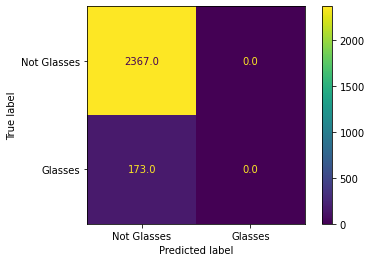

In [ ]:
cm_display1 = ConfusionMatrixDisplay(cm_nn1,display_labels=["Not Glasses","Glasses"]).plot(values_format=".1f")

### **Disparate Impact**

In [ ]:
disp_impct = (cm_nn1[1][1] / (cm_nn1[1][0] + cm_nn1[1][1])) /(cm_nn1[0][0] / (cm_nn1[0][0] + cm_nn1[0][1]))

In [ ]:
disp_impct

0.0

### **Degree of Bias**

In [ ]:
mse_loss, bias_nn, var_nn = bias_variance_decomp(nn_model, train_img_65, train_label_65, test_img_65, test_label_65, loss='mse', num_rounds=1, random_seed=1)

318/318 [==============================] - 2s 6ms/step - loss: 0.0691 - accuracy: 0.9290


In [ ]:
mse_loss, bias_nn, var_nn

(0.06811023622047244, 0.06811023622047244, 0.0)

# **Bias Mitigation**

Part A) DATA Method

In [ ]:
data_img_35 = np.array(list(dataset35["images"].values)) /255
data_label_35 = np.array(list(dataset35["status"].values)) 

In [ ]:
train_img_35, test_img_35, train_label_35, test_label_35 = model_selection.train_test_split(data_img_35,data_label_35,test_size=0.2)

In [ ]:
nn_model = Sequential()

#get number of columns in training data
n_cols = train_img_35.shape[1]


#add model layers
nn_model.add(Dense(128, activation='relu', input_shape=(n_cols,)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               627328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 668,673
Trainable params: 668,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [ ]:
nn_model.fit(train_img_35, train_label_35, epochs=5)

Epoch 1/5
329/329 [==============================] - 2s 6ms/step - loss: 0.1031 - accuracy: 0.8874
Epoch 2/5
329/329 [==============================] - 2s 6ms/step - loss: 0.0922 - accuracy: 0.9078
Epoch 3/5
329/329 [==============================] - 2s 6ms/step - loss: 0.0960 - accuracy: 0.9040
Epoch 4/5
329/329 [==============================] - 2s 6ms/step - loss: 0.0991 - accuracy: 0.9009
Epoch 5/5
329/329 [==============================] - 2s 6ms/step - loss: 0.1006 - accuracy: 0.8994


In [ ]:
test_loss_data35, test_acc_data35 = nn_model.evaluate(test_img_35, test_label_35)


83/83 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9022


In [ ]:
print('accuracy and loss on the testing data in DATA method ', test_acc_data65, test_loss_data65)

accuracy and loss on the testing data in DATA method  0.9318897724151611 0.06811022013425827


In [ ]:
pred_test_labels35_prob = nn_model.predict_classes(test_img_35)
cm_nn1 = confusion_matrix (test_label_35,pred_test_labels35_prob.round() )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### **Confusion Matrix**

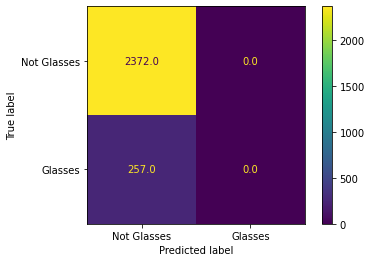

In [ ]:
cm_display1 = ConfusionMatrixDisplay(cm_nn1,display_labels=["Not Glasses","Glasses"]).plot(values_format=".1f")

In [ ]:
tpr_new = (cm_nn1[0][0] / (cm_nn1[0][0] + cm_nn1[0][1]))
tnr_new = (cm_nn1[1][1] / (cm_nn1[0][1] + cm_nn1[1][1]))


In [ ]:
tpr_new,tnr_new

(0.9995784148397976, 0.8333333333333334)

New Metric

In [ ]:
from statistics import mean 
data = (tpr_new,tnr_new)
new_metric_am = mean(data)
print ("New metric value in terms of airthmatic mean of tpr and tnr :",new_metric_am )

New metric value in terms of airthmatic mean of tpr and tnr : 0.9164558740865655


In [ ]:
import math 
new_metric_gm = math.sqrt(tpr_new*tnr_new)
print ("New metric value in terms of geometric mean of tpr and tnr :",new_metric_gm )


New metric value in terms of geometric mean of tpr and tnr : 0.9126784824715098


### **Disparate Impact**

In [ ]:
disp_impct = (cm_nn1[1][1] / (cm_nn1[1][0] + cm_nn1[1][1])) /(cm_nn1[0][0] / (cm_nn1[0][0] + cm_nn1[0][1]))

In [ ]:
disp_impct

0.0

### **Degree of Bias**

In [ ]:
mse_loss, bias_nn, var_nn = bias_variance_decomp(nn_model, train_img_35, train_label_35, test_img_35, test_label_35, loss='mse', num_rounds=1, random_seed=1)

329/329 [==============================] - 2s 6ms/step - loss: 0.0944 - accuracy: 0.9060


In [ ]:
mse_loss, bias_nn, var_nn

(0.09775580068467098, 0.09775580068467098, 0.0)

Part B) ALGORITHMIC Method

In [ ]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
nn_model.fit(train_img_35, train_label_35, epochs=15)

Epoch 1/15
329/329 [==============================] - 3s 6ms/step - loss: 5.2320 - accuracy: 0.8970
Epoch 2/15
329/329 [==============================] - 2s 6ms/step - loss: 0.3130 - accuracy: 0.9041
Epoch 3/15
329/329 [==============================] - 2s 6ms/step - loss: 0.3155 - accuracy: 0.9009
Epoch 4/15
329/329 [==============================] - 2s 6ms/step - loss: 0.3086 - accuracy: 0.9025
Epoch 5/15
329/329 [==============================] - 2s 6ms/step - loss: 0.2998 - accuracy: 0.9012
Epoch 6/15
329/329 [==============================] - 2s 6ms/step - loss: 0.2939 - accuracy: 0.9023
Epoch 7/15
329/329 [==============================] - 2s 6ms/step - loss: 0.2820 - accuracy: 0.9059
Epoch 8/15
329/329 [==============================] - 2s 6ms/step - loss: 0.2815 - accuracy: 0.9036
Epoch 9/15
329/329 [==============================] - 2s 6ms/step - loss: 0.2892 - accuracy: 0.9011
Epoch 10/15
329/329 [==============================] - 2s 6ms/step - loss: 0.2744 - accuracy: 0.9061

In [ ]:
test_loss_data35, test_acc_data35 = nn_model.evaluate(test_img_35, test_label_35)


83/83 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.9038


In [ ]:
print('accuracy and loss on the testing data in algorithmic method', test_acc_data35, test_loss_data35)

accuracy and loss on the testing data in algorithmic method 0.9037656784057617 0.31022512912750244


In [ ]:
pred_test_labels35_prob = nn_model.predict(test_img_35)
cm_nn1 = confusion_matrix (test_label_35,pred_test_labels35_prob.round() )

### **Confusion Matrix**

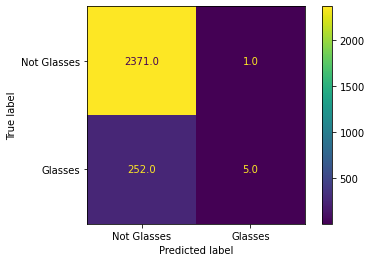

In [ ]:
cm_display1 = ConfusionMatrixDisplay(cm_nn1,display_labels=["Not Glasses","Glasses"]).plot(values_format=".1f")

### **Disparate Impact**

In [ ]:
disp_impct = (cm_nn1[1][1] / (cm_nn1[1][0] + cm_nn1[1][1])) /(cm_nn1[0][0] / (cm_nn1[0][0] + cm_nn1[0][1]))

In [ ]:
disp_impct

0.019463458423525513

### **Degree of Bias**

In [ ]:
mse_loss, bias_nn, var_nn = bias_variance_decomp(nn_model, train_img_35, train_label_35, test_img_35, test_label_35, loss='mse', num_rounds=1, random_seed=1)

329/329 [==============================] - 2s 6ms/step - loss: 0.3373 - accuracy: 0.9020


In [ ]:
mse_loss, bias_nn, var_nn

(0.08699203324763614, 0.08699203324763614, 0.0)